# Contextual Bandits Agent with Policy Gradient Method (Stochastic) in Prediction Markets Problem
---
This is a program that simulates an agent who trades in a prediction market. The problem that the prediction market aims to solve is to predict the real distribution of a random variable. We define the random variable as the colour of a bucket. The problem design comes from a human-subjective experiment for decision markets.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from main import stochastic_training_notebook
from Environment import ScoreFunction, DecisionRule

In [13]:
learning_rate_theta = 1e-4
learning_rate_wv = 1e-4
memory_size = 16
batch_size = 16
training_episodes = int(4e6)
decay_rate = 0
beta1 = 0.9
beta2 = 0.9999
# Algorithm: adam, momentum, regular
algorithm = 'regular'
learning_std = False
fixed_std = 0.3
# Bucket parameters
pr_red_ball_red_bucket = 2/3
pr_red_ball_blue_bucket = 1/3
# prior_red_list = [3/4, 1/4]
prior_red_list = None
agent_num=2
action_num=2
preferred_colour_pr_list = [0.8, 0.2]
score_func = ScoreFunction.LOG
decision_rule = DecisionRule.STOCHASTIC
agent_list = []

system_accumulated_reward = stochastic_training_notebook(agent_list, learning_rate_theta, learning_rate_wv,
                             memory_size, batch_size, training_episodes,
                             decay_rate, beta1, beta2, algorithm, learning_std,
                             fixed_std, pr_red_ball_red_bucket, pr_red_ball_blue_bucket,
                             prior_red_list, agent_num, action_num, score_func, decision_rule, 
                             preferred_colour_pr_list)

  0%|          | 0/4000000 [00:00<?, ?it/s]

agent0
learning_rate_theta= 0.0001  learning_rate_wv= 0.0001
memory_size= 16  standard deviation= 0.3
Updating weights with regular algorithm.
agent1
learning_rate_theta= 0.0001  learning_rate_wv= 0.0001
memory_size= 16  standard deviation= 0.3
Updating weights with regular algorithm.


In [14]:
print(system_accumulated_reward/training_episodes)

0.60539375


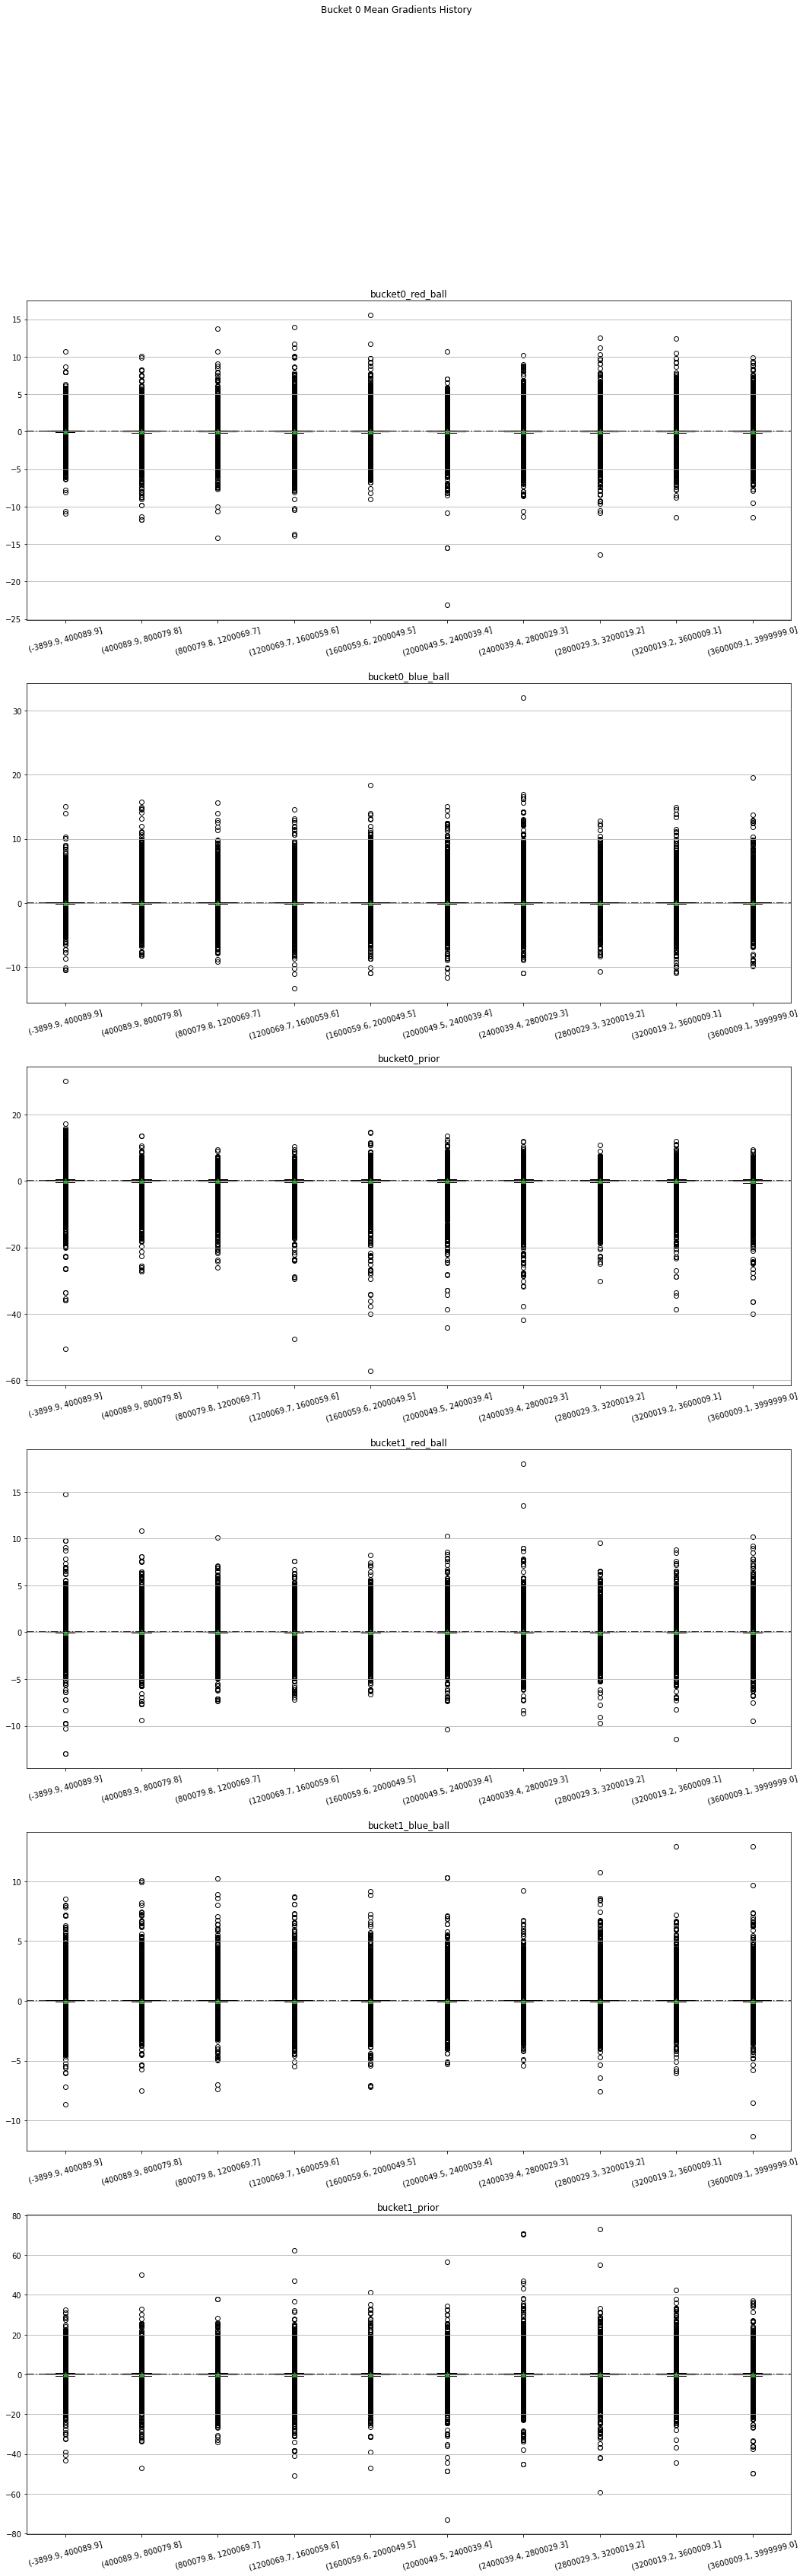

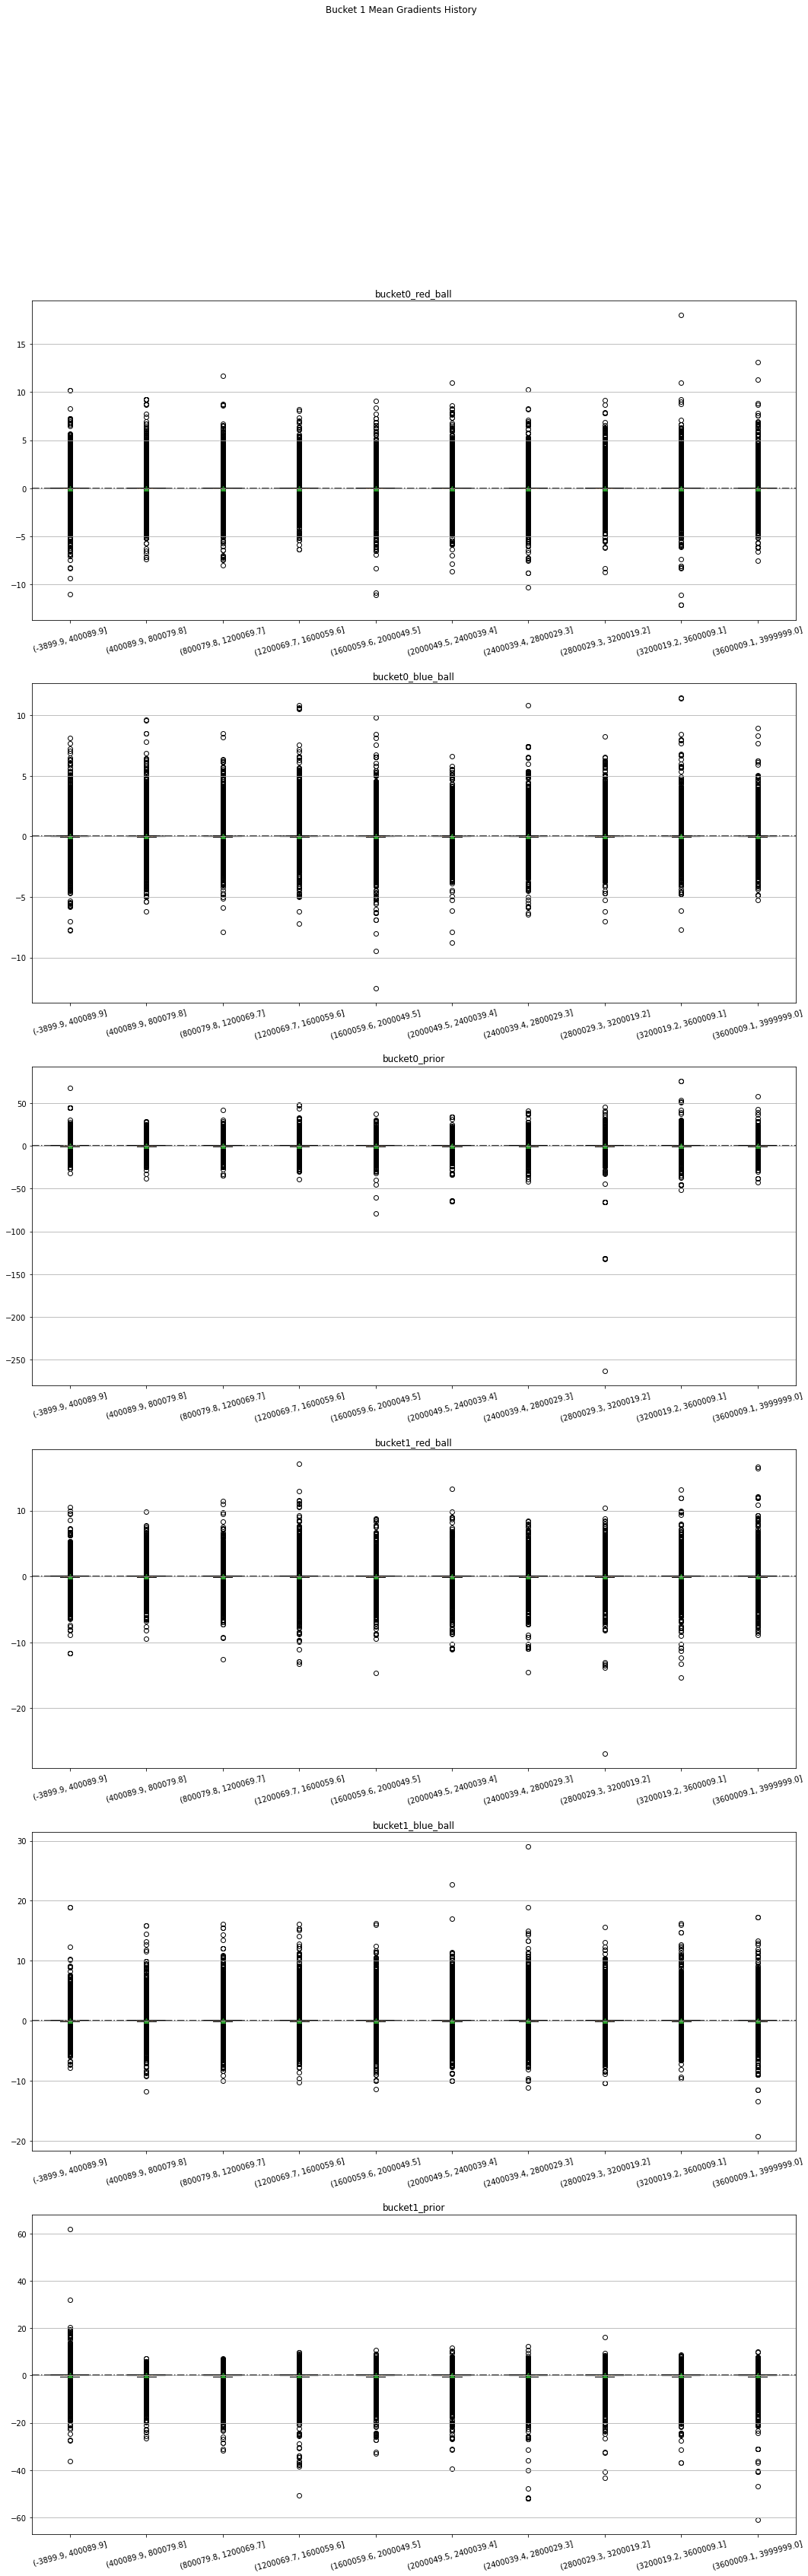

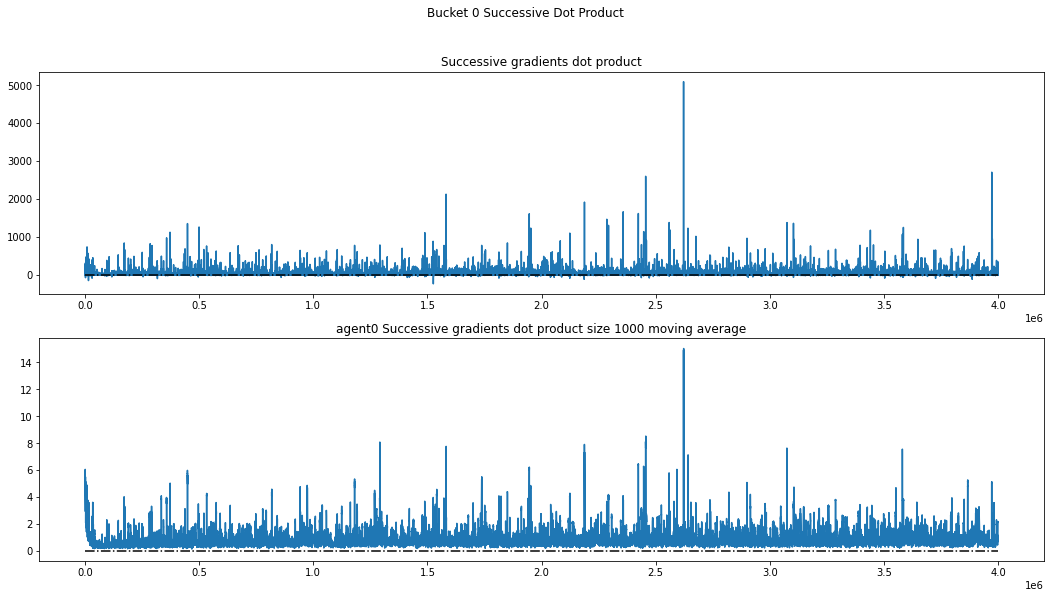

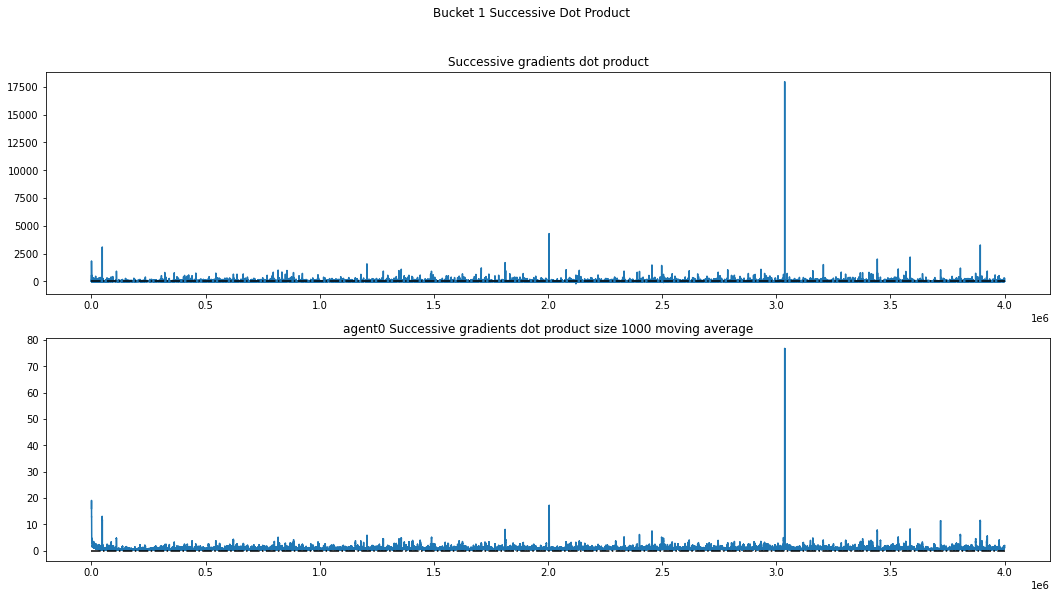

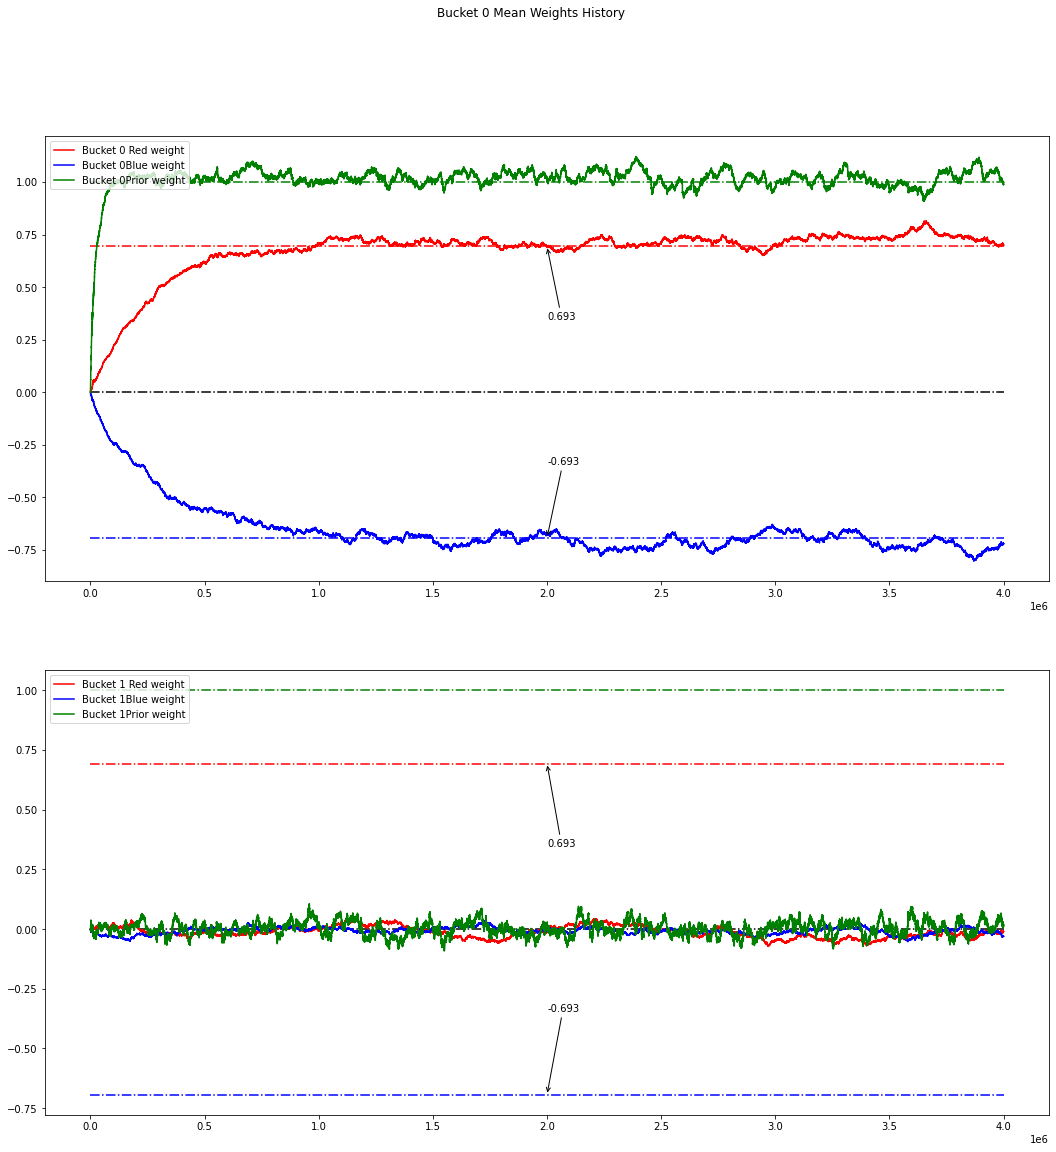

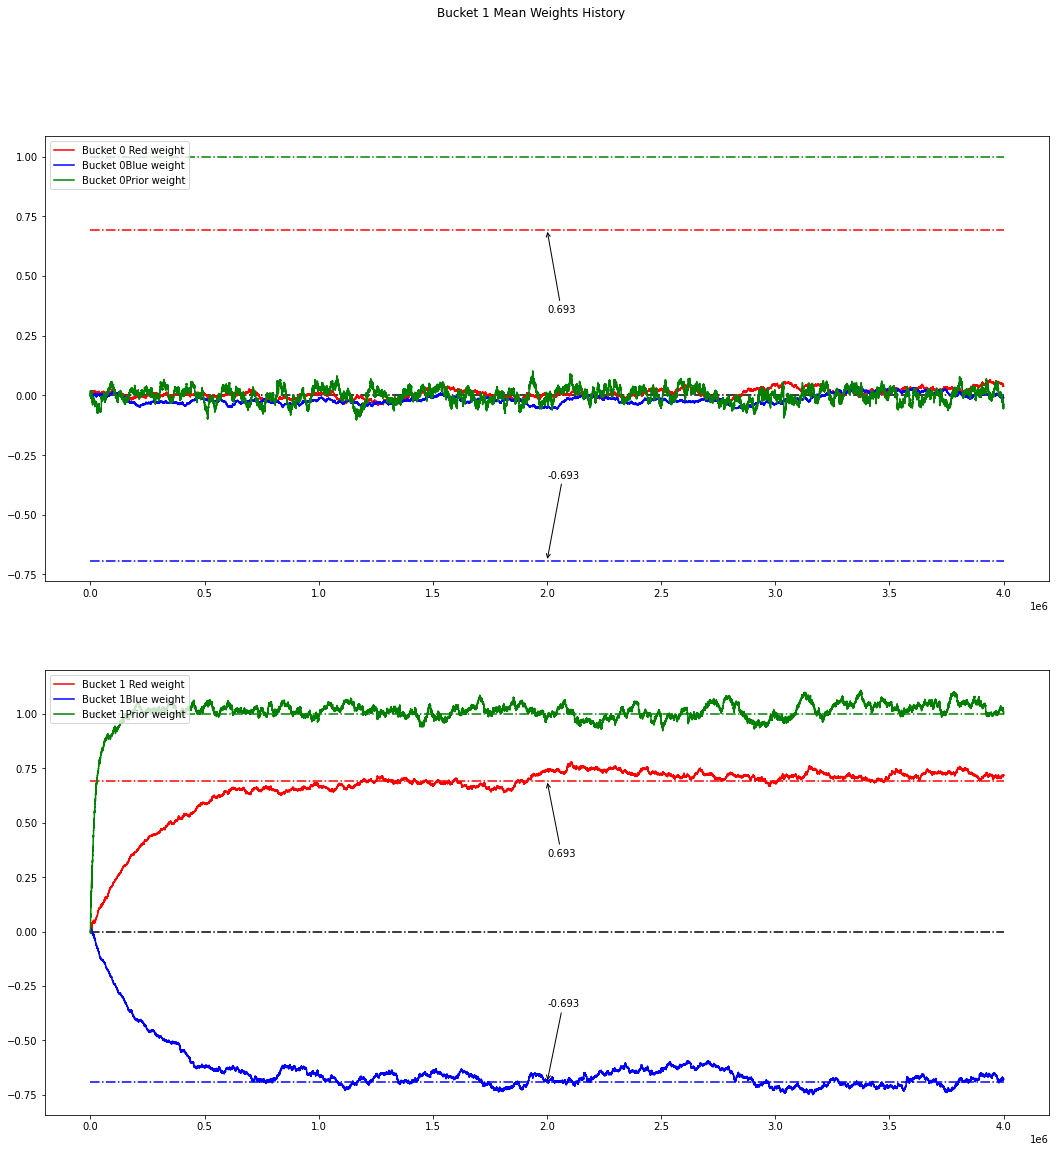

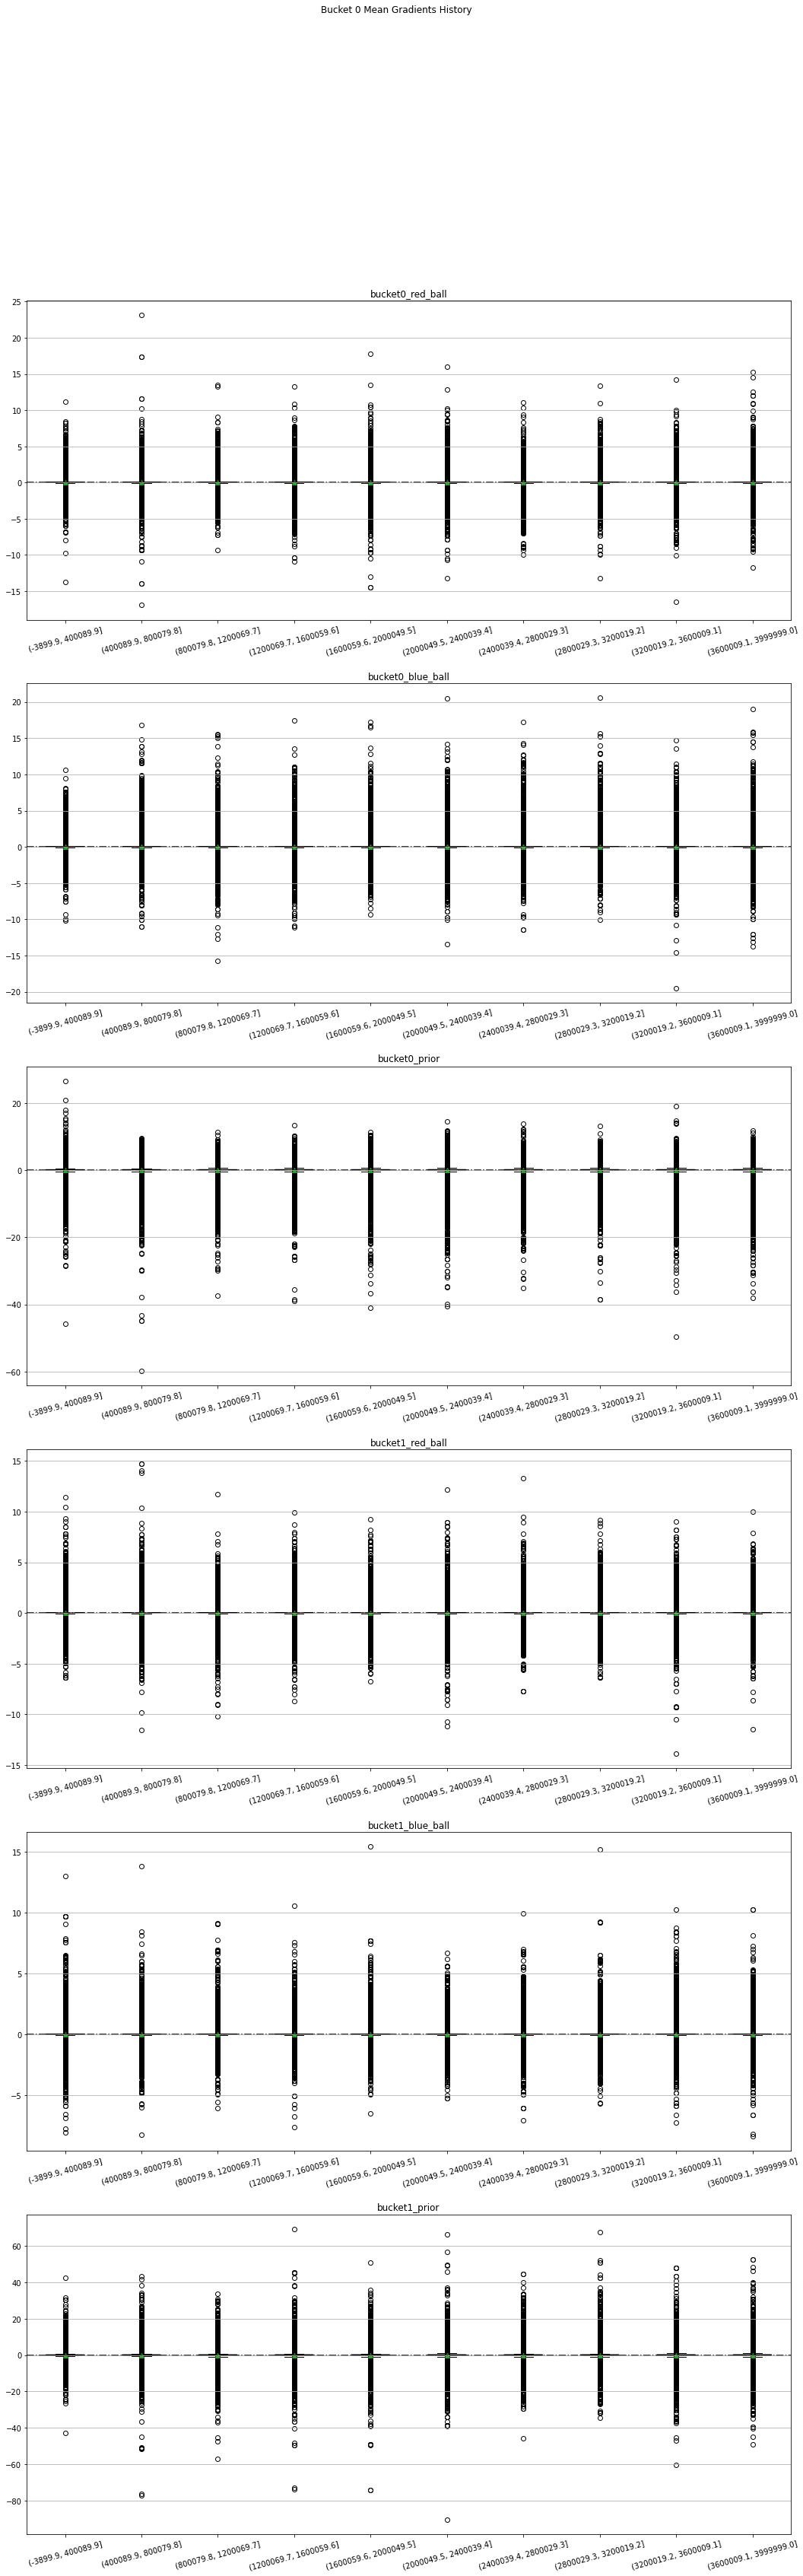

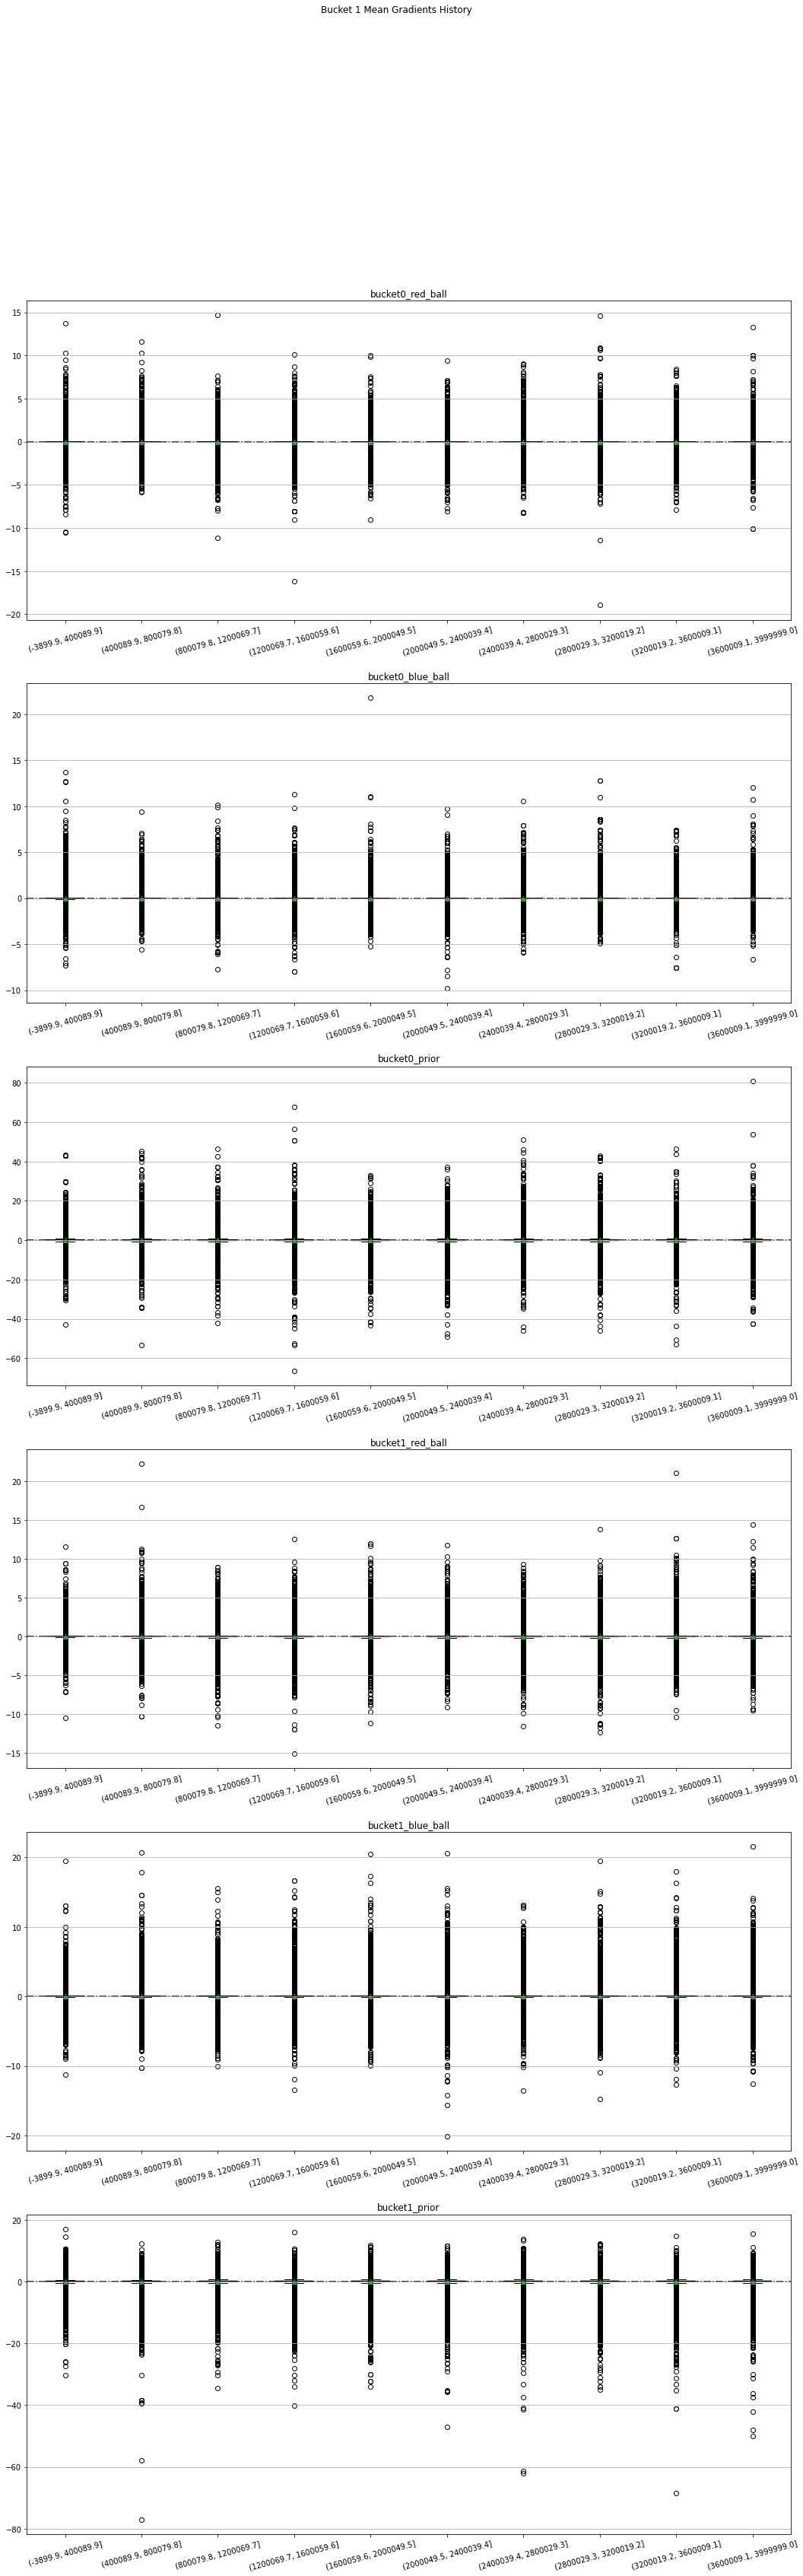

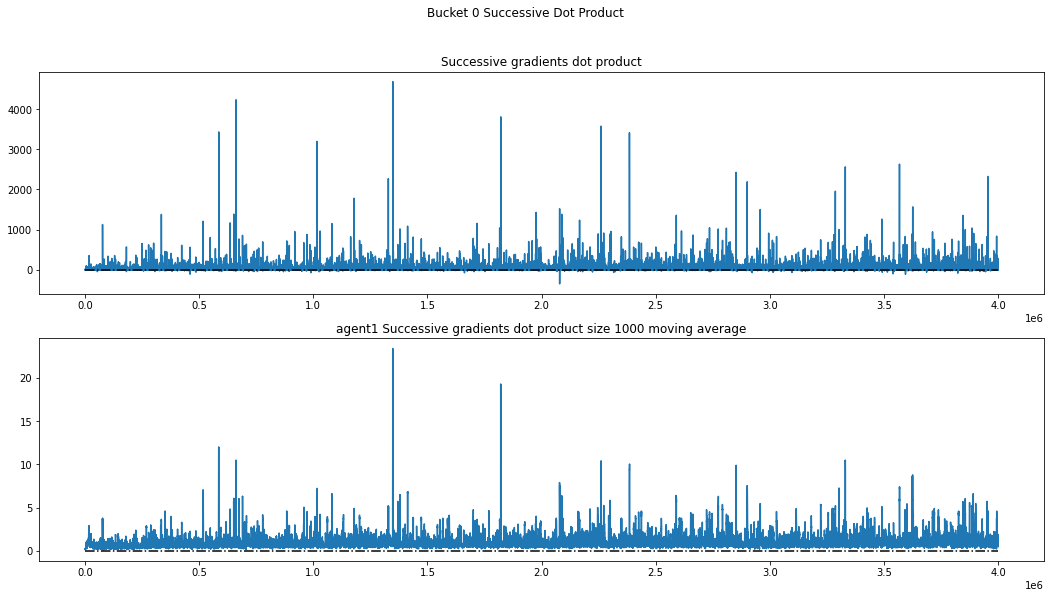

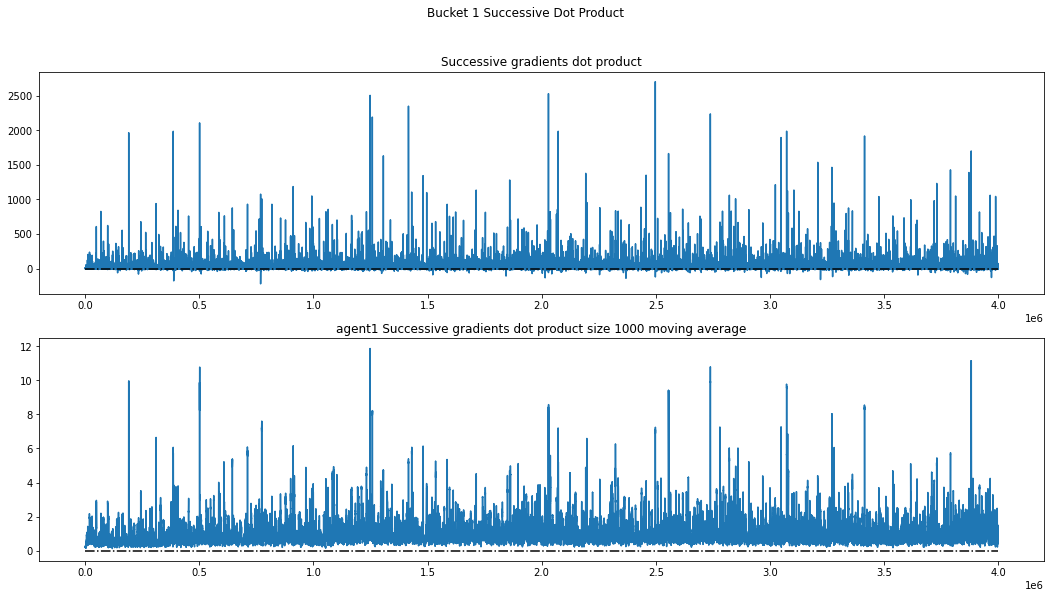

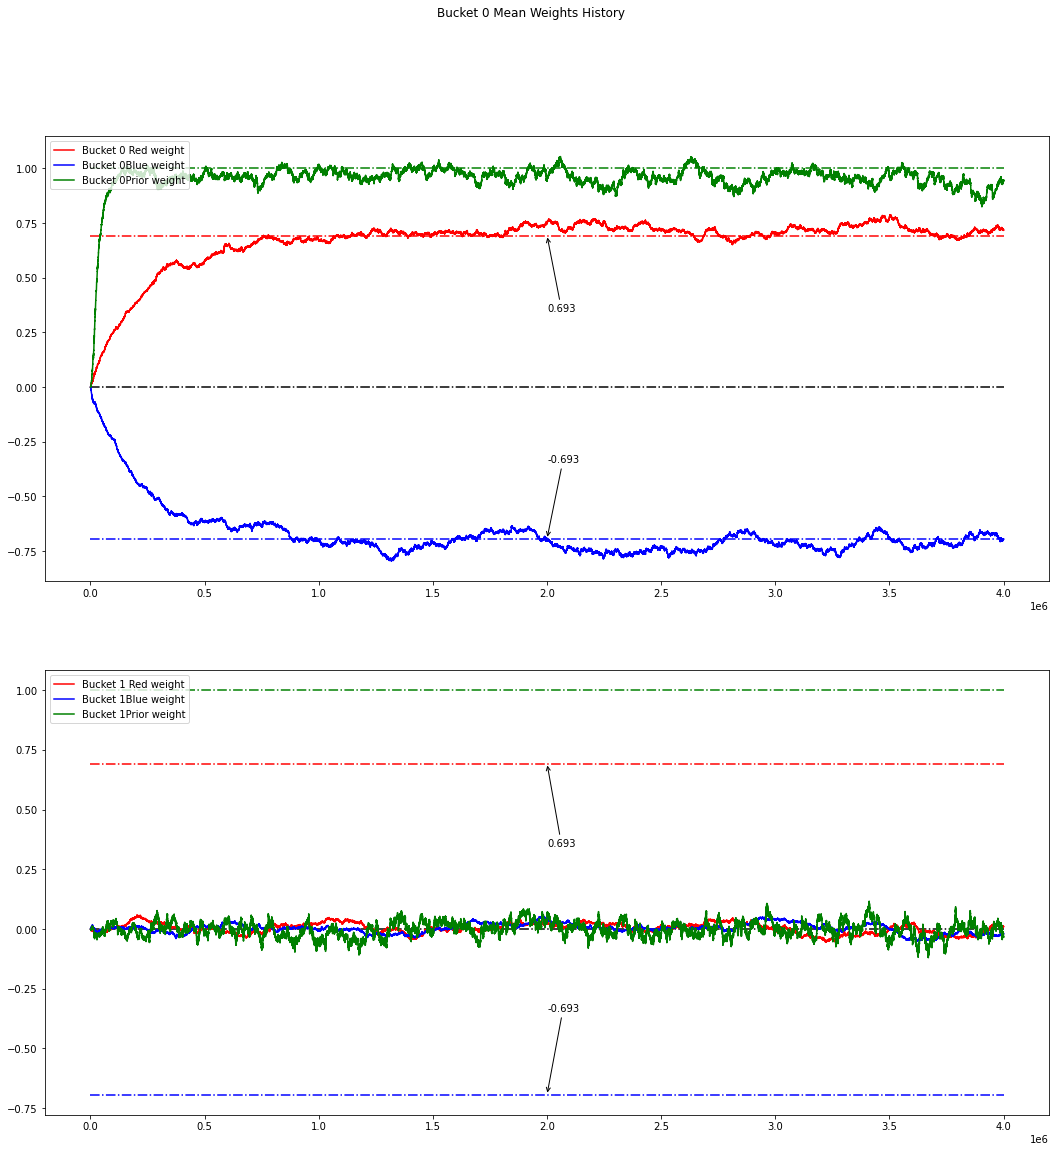

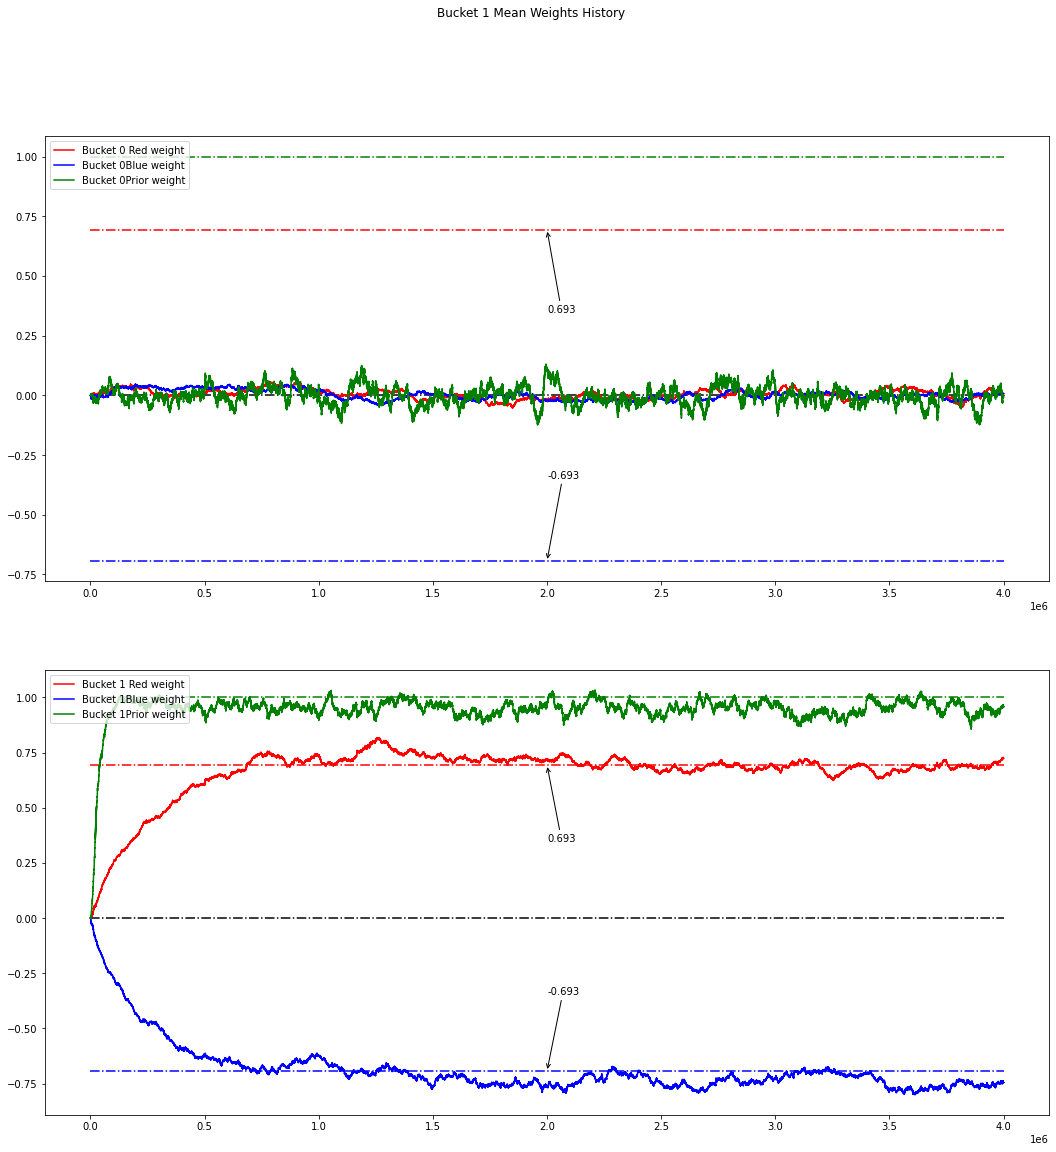

In [15]:
for agent in agent_list:
#     agent.reward_history_plot()
#     agent.report_history_plot()
    agent.mean_gradients_history_plot()
    agent.mean_gradients_successive_dot_product_plot()
#     agent.mean_history_plot()
    agent.mean_weights_history_plot()
    agent.std_gradients_history_plot()
    agent.std_history_plot()

In [16]:
mean_weights_df_list = agent_list[1].mean_weights_history_df()

In [17]:
mean_weights_df_list[0].tail()

bucket0_red_ball  bucket0_blue_ball  bucket0_prior  bucket1_red_ball  \
3999995          0.716839          -0.693766       0.948083          0.010178   
3999996          0.716831          -0.693730       0.948066          0.010178   
3999997          0.716829          -0.693719       0.948044          0.010179   
3999998          0.716829          -0.693709       0.948035          0.010179   
3999999          0.716825          -0.693711       0.948029          0.010188   

         bucket1_blue_ball  bucket1_prior  
3999995          -0.018596      -0.033397  
3999996          -0.018608      -0.033489  
3999997          -0.018635      -0.033496  
3999998          -0.018646      -0.033525  
3999999          -0.018660      -0.033498

In [18]:
# mean_weights_df_list[1].tail()

In [19]:
report_history_df = agent_list[0].report_history_dataframe()

In [20]:
report_history_df.tail(20)

bucket_no signal  bucket_0_prior  bucket_0_report  bucket_0_mean  \
3999980          0    RED        0.580905         0.748366       0.739257   
3999981          1   BLUE        0.960289         0.963714       0.954270   
3999982          0   BLUE        0.802336         0.725859       0.665568   
3999983          0    RED        0.289895         0.469187       0.462902   
3999984          1    RED        0.818768         0.860896       0.820574   
3999985          1   BLUE        0.889349         0.877937       0.879837   
3999986          1   BLUE        0.802189         0.807569       0.798543   
3999987          0    RED        0.627458         0.749018       0.766362   
3999988          0    RED        0.472563         0.499402       0.631103   
3999989          0    RED        0.153906         0.313127       0.269191   
3999990          0   BLUE        0.996898         0.993020       0.993224   
3999991          0   BLUE        0.238919         0.121903       0.126880   
3999992          1    RED        0.619198         0.637636       0.623846   
3999993          0    RED        0.358994         0.509059       0.533180   
3999994          1    RED        0.741042         0.763354       0.728409   
3999995          1   BLUE        0.728640         0.687786       0.706690   
3999996          0   BLUE        0.371620         0.241836       0.217935   
3999997          1   BLUE        0.567075         0.646909       0.560094   
3999998          1    RED        0.883182         0.857141       0.878666   
3999999          1    RED        0.322649         0.324062       0.326403   

         bucket_0_best  bucket_0_std  bucket_1_prior  bucket_1_report  \
3999980       0.734902           0.3        0.755923         0.748184   
3999981       0.960289           0.3        0.011607         0.004011   
3999982       0.669918           0.3        0.831399         0.777617   
3999983       0.449486           0.3        0.885187         0.884840   
3999984       0.818768           0.3        0.928651         0.981344   
3999985       0.889349           0.3        0.110696         0.058590   
3999986       0.802189           0.3        0.833293         0.723563   
3999987       0.771090           0.3        0.158648         0.187363   
3999988       0.641824           0.3        0.032954         0.018806   
3999989       0.266756           0.3        0.244426         0.345554   
3999990       0.993814           0.3        0.690993         0.544647   
3999991       0.135666           0.3        0.018655         0.020703   
3999992       0.619198           0.3        0.900002         0.954900   
3999993       0.528324           0.3        0.555538         0.601316   
3999994       0.741042           0.3        0.078573         0.136040   
3999995       0.728640           0.3        0.019688         0.012526   
3999996       0.228215           0.3        0.085386         0.149411   
3999997       0.567075           0.3        0.586887         0.389956   
3999998       0.883182           0.3        0.411117         0.542553   
3999999       0.322649           0.3        0.738915         0.839609   

         bucket_1_mean  bucket_1_best  bucket_1_std  
3999980       0.760638       0.755923           0.3  
3999981       0.005269       0.005838           0.3  
3999982       0.822045       0.831399           0.3  
3999983       0.892271       0.885187           0.3  
3999984       0.961835       0.963006           0.3  
3999985       0.055201       0.058591           0.3  
3999986       0.706175       0.714227           0.3  
3999987       0.161278       0.158648           0.3  
3999988       0.034400       0.032954           0.3  
3999989       0.264217       0.244426           0.3  
3999990       0.639309       0.690993           0.3  
3999991       0.019297       0.018655           0.3  
3999992       0.947706       0.947370           0.3  
3999993       0.570493       0.555538           0.3  
3999994       0.144084       0.145697          

In [11]:
import math
from scipy import stats
from scipy.special import logit, expit
from Environment import expected_log_reward_red_ball, analytical_best_report_ru_rs

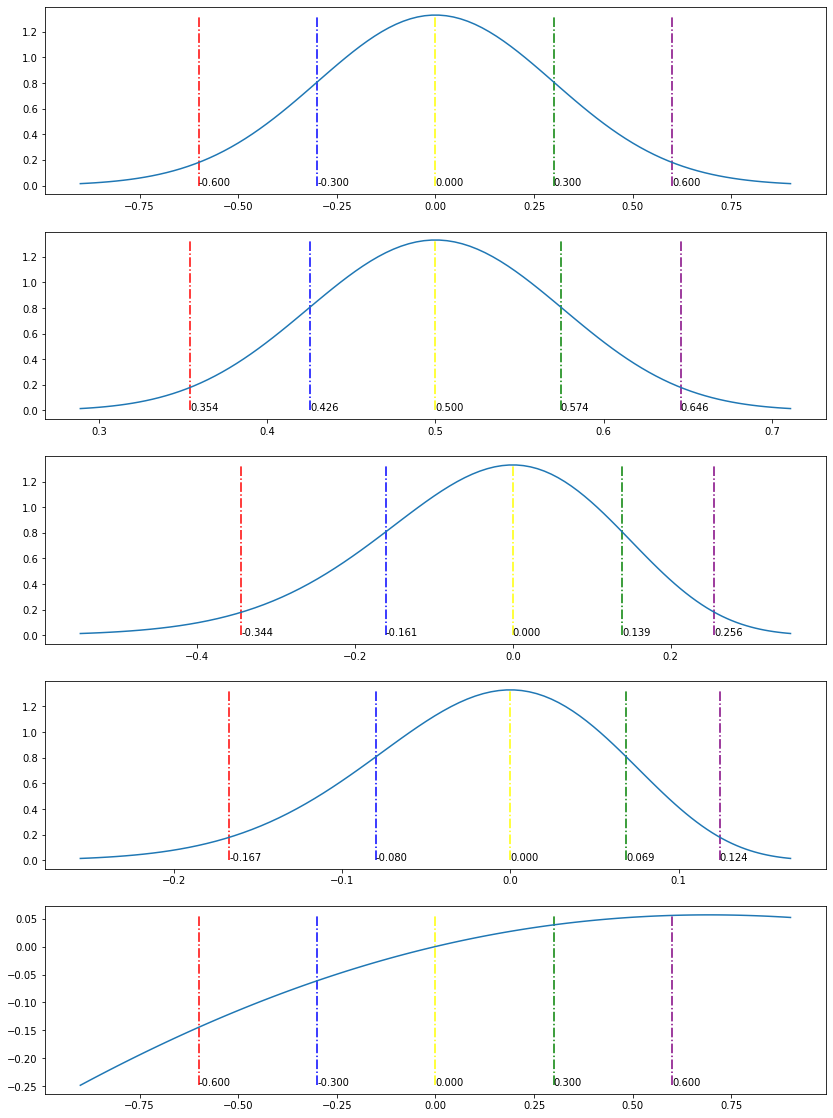

In [12]:
mu = 0
sigma = 0.3
prior_red = 0.5
colours = ['red', 'blue', 'yellow', 'green', 'purple']
variance = np.square(sigma)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
z = np.linspace(mu-2*sigma, mu+2*sigma, 5)
fig, axs = plt.subplots(5, figsize=(14, 4*5))
axs[0].plot(x, stats.norm.pdf(x, mu, sigma))
axs[0].vlines(z, ymin=0, ymax=np.max(stats.norm.pdf(x=x, loc=mu, scale=sigma)), linestyle='dashdot', colors=colours)
for value, coord in zip(z, zip(z, [0]*5)):
    axs[0].annotate('%.3f'%value, xy=coord)
axs[1].plot(expit(x), stats.norm.pdf(x, mu, sigma))
axs[1].vlines(expit(z), ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
for value, coord in zip(expit(z), zip(expit(z), [0]*5)):
    axs[1].annotate('%.3f'%value, xy=coord)
axs[2].plot(np.log(expit(x))-np.log(1/2), stats.norm.pdf(x, mu, sigma))
# axs[2].plot(np.log(1/2) - np.log(expit(x)), stats.norm.pdf(x, mu, sigma))
axs[2].vlines(np.log(expit(z))-np.log(1/2), ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
for value, coord in zip(np.log(expit(z))-np.log(1/2), zip(np.log(expit(z))-np.log(1/2), [0]*5)):
    axs[2].annotate('%.3f'%value, xy=coord)
axs[3].plot(expit(x) - (np.square(expit(x)) + np.square(1 - expit(x)))/2 - 0.25, stats.norm.pdf(x, mu, sigma))
axs[3].vlines(expit(z) - (np.square(expit(z)) + np.square(1 - expit(z)))/2 - 0.25, ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
for value, coord in zip(expit(z) - (np.square(expit(z)) + np.square(1 - expit(z)))/2 - 0.25, zip(expit(z) - (np.square(expit(z)) + np.square(1 - expit(z)))/2 - 0.25, [0]*5)):
    axs[3].annotate('%.3f'%value, xy=coord)
actual_pr_ru_rs = analytical_best_report_ru_rs(prior_red, pr_red_ball_red_bucket, pr_red_ball_blue_bucket)
expected_init = expected_log_reward_red_ball(actual_pr_ru_rs, 1/2, prior_red)
expected_z = expected_log_reward_red_ball(actual_pr_ru_rs, np.array(expit(z)), prior_red)
expected_x = expected_log_reward_red_ball(actual_pr_ru_rs, np.array(expit(x)), prior_red)
# axs[4].plot(expected_x-expected_init, stats.norm.pdf(x, mu, sigma))
# axs[4].vlines(expected_z-expected_init, ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
# for value, coord in zip(expected_z-expected_init, zip(expected_z-expected_init, [0]*5)):
#     axs[4].annotate('%.3f'%value, xy=coord)
axs[4].plot(x, expected_x-expected_init)
axs[4].vlines(z, ymin=np.min(expected_x-expected_init), ymax=np.max(expected_x-expected_init), linestyle='dashdot', colors=colours)
for value, coord in zip(z, zip(z, [np.min(expected_x-expected_init)]*5)):
    axs[4].annotate('%.3f'%value, xy=coord)
plt.show()

In [13]:
from Environment import expected_log_reward_red_ball, expected_log_reward_blue_ball, analytical_best_report_ru_rs, analytical_best_report_ru_bs

In [14]:
pr_ru1 = 1/4
pr_ru2 = 3/4
pr_bs_ru = 1/3
pr_bs_bu = 2/3

In [15]:
r1 = np.linspace(start=0.01, stop=0.99, num=50)
r2 = np.linspace(start=0.01, stop=0.99, num=50)
r1v, r2v = np.meshgrid(r1, r2)
actual_pr_ru_bs1 = analytical_best_report_ru_bs(pr_ru=pr_ru1, pr_bs_ru=pr_bs_ru, pr_bs_bu=pr_bs_bu)
actual_pr_ru_bs2 = analytical_best_report_ru_bs(pr_ru=pr_ru2, pr_bs_ru=pr_bs_ru, pr_bs_bu=pr_bs_bu)
rv = r1v * (r1v > r2v) + r2v * (r1v <= r2v)
actual_pr_ru_bsv = actual_pr_ru_bs1 * (r1v > r2v) + pr_ru2 * (r1v <= r2v)
pr_ruv = pr_ru1 * (r1v > r2v) + pr_ru2 * (r1v <= r2v)

In [16]:
rv

array([[0.01, 0.03, 0.05, ..., 0.95, 0.97, 0.99],
       [0.03, 0.03, 0.05, ..., 0.95, 0.97, 0.99],
       [0.05, 0.05, 0.05, ..., 0.95, 0.97, 0.99],
       ...,
       [0.95, 0.95, 0.95, ..., 0.95, 0.97, 0.99],
       [0.97, 0.97, 0.97, ..., 0.97, 0.97, 0.99],
       [0.99, 0.99, 0.99, ..., 0.99, 0.99, 0.99]])

In [17]:
actual_pr_ru_bsv

array([[0.75      , 0.14285714, 0.14285714, ..., 0.14285714, 0.14285714,
        0.14285714],
       [0.75      , 0.75      , 0.14285714, ..., 0.14285714, 0.14285714,
        0.14285714],
       [0.75      , 0.75      , 0.75      , ..., 0.14285714, 0.14285714,
        0.14285714],
       ...,
       [0.75      , 0.75      , 0.75      , ..., 0.75      , 0.14285714,
        0.14285714],
       [0.75      , 0.75      , 0.75      , ..., 0.75      , 0.75      ,
        0.14285714],
       [0.75      , 0.75      , 0.75      , ..., 0.75      , 0.75      ,
        0.75      ]])

In [18]:
def dm_expected_log_reward_blue_ball(pr_ru1, pr_ru2, pr_bs_ru, pr_bs_bu):
    r1 = np.linspace(start=0.01, stop=0.99, num=50)
    r2 = np.linspace(start=0.01, stop=0.99, num=50)
    r1v, r2v = np.meshgrid(r1, r2)
    actual_pr_ru_bs1 = analytical_best_report_ru_bs(pr_ru=pr_ru1, pr_bs_ru=pr_bs_ru, pr_bs_bu=pr_bs_bu)
    actual_pr_ru_bs2 = analytical_best_report_ru_bs(pr_ru=pr_ru2, pr_bs_ru=pr_bs_ru, pr_bs_bu=pr_bs_bu)
    rv = r1v * (r1v > r2v) + r2v * (r1v <= r2v)
    actual_pr_ru_bsv = actual_pr_ru_bs1 * (r1v > r2v) + pr_ru2 * (r1v <= r2v)
    pr_ruv = pr_ru1 * (r1v > r2v) + pr_ru2 * (r1v <= r2v)
    return r1v, r2v, expected_log_reward_blue_ball(actual_pr_ru_bs=actual_pr_ru_bsv, estimated_pr_ru_bs=rv, pr_ru=pr_ruv)

In [19]:
r1v, r2v, z = dm_expected_log_reward_blue_ball( pr_ru1, pr_ru2, pr_bs_ru, pr_bs_bu)

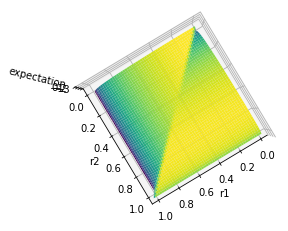

In [20]:
# %matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(r1v, r2v, z, 100, cmap='binary')
ax.plot_surface(r1v, r2v, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('r1')
ax.set_ylabel('r2')
ax.set_zlabel('expectation')
ax.view_init(90, 60)

plt.show()

In [21]:
pr_ru1 = 1/4
pr_ru2 = 3/4
pr_rs_ru = 2/3
pr_rs_bu = 1/3

In [22]:
def dm_expected_log_reward_red_ball(pr_ru1, pr_ru2, pr_rs_ru, pr_rs_bu):
    r1 = np.linspace(start=0.01, stop=0.99, num=50)
    r2 = np.linspace(start=0.01, stop=0.99, num=50)
    r1v, r2v = np.meshgrid(r1, r2)    
    actual_pr_ru_rs1 = analytical_best_report_ru_rs(pr_ru=pr_ru1, pr_rs_ru=pr_rs_ru, pr_rs_bu=pr_rs_bu)
    actual_pr_ru_rs2 = analytical_best_report_ru_rs(pr_ru=pr_ru2, pr_rs_ru=pr_rs_ru, pr_rs_bu=pr_rs_bu)   
    rv = r1v * (r1v > r2v) + r2v * (r1v <= r2v)
    actual_pr_ru_rsv = actual_pr_ru_rs1 * (r1v > r2v) + pr_ru2 * (r1v <= r2v)
    pr_ruv = pr_ru1 * (r1v > r2v) + pr_ru2 * (r1v <= r2v)
    return r1v, r2v, expected_log_reward_red_ball(actual_pr_ru_rs=actual_pr_ru_rsv, estimated_pr_ru_rs=rv, pr_ru=pr_ruv)

r1v, r2v, z = dm_expected_log_reward_red_ball(pr_ru1, pr_ru2, pr_rs_ru, pr_rs_bu)

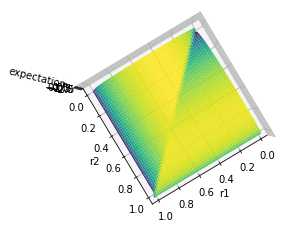

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(r1v, r2v, z, 100, cmap='binary')
ax.plot_surface(r1v, r2v, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('r1')
ax.set_ylabel('r2')
ax.set_zlabel('expectation')
ax.view_init(90, 60)

plt.show()

In [24]:
import plotly.graph_objects as go

In [25]:
fig = go.Figure(data=[go.Surface(z=z, x=r1v, y=r2v)])
fig.update_layout(title='Mt Bruno Elevation', autosize=True,
#                   width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [26]:
pr_ru1 = 1/4
pr_ru2 = 3/4
pr_rs_ru = 2/3
pr_rs_bu = 1/3

In [27]:
from numpy.random import Generator, PCG64
def stochastic_decision_rule(r1v, r2v, probabilities, pr_ru1, pr_ru2, pr_rs_ru, pr_rs_bu):
#     generator = Generator(PCG64())
    result_array = np.zeros(r1v.shape)
    r_stack_v = np.dstack((r1v, r2v))
    for i in range(r_stack_v.shape[0]):
        for j in range(r_stack_v.shape[1]):
            r1, r2 = r_stack_v[i][j]
            if r1 > r2:
                pr = probabilities
            else:
                pr = probabilities[::-1]
            actual_pr_ru_rs1 = analytical_best_report_ru_rs(pr_ru=pr_ru1, pr_rs_ru=pr_rs_ru, pr_rs_bu=pr_rs_bu)
            actual_pr_ru_rs2 = analytical_best_report_ru_rs(pr_ru=pr_ru2, pr_rs_ru=pr_rs_ru, pr_rs_bu=pr_rs_bu) 
            result_array[i][j] = expected_log_reward_red_ball(actual_pr_ru_rs=actual_pr_ru_rs1, estimated_pr_ru_rs=r1, pr_ru=pr_ru1)/pr[0] + expected_log_reward_red_ball(actual_pr_ru_rs=pr_ru2, estimated_pr_ru_rs=r2, pr_ru=pr_ru2)/pr[1]
            
    return result_array

In [28]:
z = stochastic_decision_rule(r1v, r2v, [0.8, 0.2], pr_ru1, pr_ru2, pr_rs_ru, pr_rs_bu)

In [29]:
actual_pr_ru_rs1 = analytical_best_report_ru_rs(pr_ru=pr_ru1, pr_rs_ru=pr_rs_ru, pr_rs_bu=pr_rs_bu)
actual_pr_ru_rs1

0.4

In [30]:
fig = go.Figure(data=[go.Surface(z=z, x=r1v, y=r2v)])
fig.update_layout(title='Mt Bruno Elevation', autosize=True,
#                   width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()